In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.colors as mcolors

In [2]:
# reading the database
data = pd.read_csv("Cleaned_text_overview-of-recordings.csv")

In [5]:
data.head()

,phrase,prompt,phrase_length,phrase_num_words,mean_word_len,phrase_non_stopwords,new_text
0,When I remember her I feel down,Emotional pain,31,7,3.571429,5,remember feel
1,When I carry heavy things I feel like breaking...,Hair falling out,54,11,4.000000,9,carry heavy things feel like breaking back
2,there is too much pain when i move my arm,Heart hurts,41,10,3.200000,2,much pain move arm
3,My son had his lip pierced and it is swollen a...,Infected wound,103,22,3.727273,11,son lip pierced swollen skin inside lip grey l...
4,My muscles in my lower back are aching,Infected wound,38,8,3.875000,4,muscles lower back aching


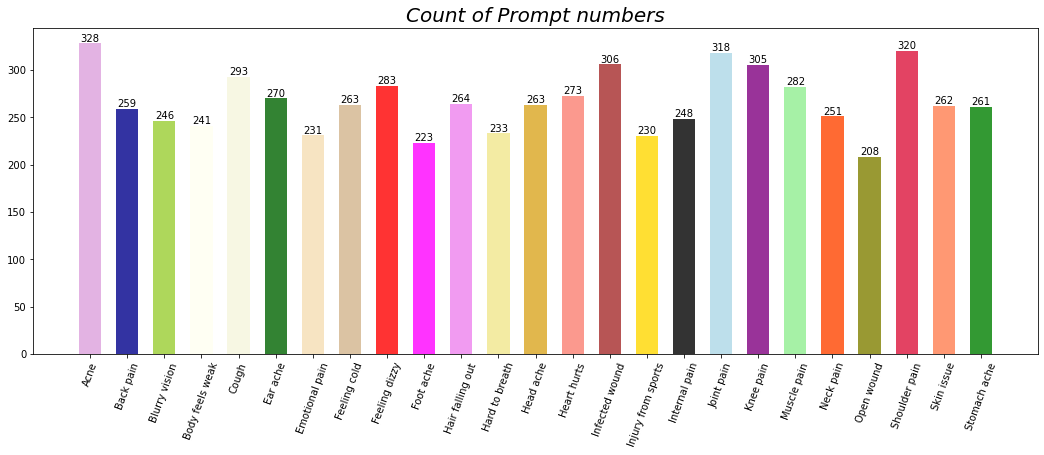

In [155]:
arr = np.array(data['prompt'])
key = np.unique(data['prompt'])

overlap = {name for name in mcolors.CSS4_COLORS if f'xkcd:{name}' in mcolors.XKCD_COLORS}

result={}
for k in key:
    mask = (arr==k)
    arr_new = arr[mask]
    v = arr_new.size
    result[k]=v

x = list(result.keys())
y = list(result.values())

plt.figure(figsize=(18,6))

plt.bar(x,y,width =0.6,alpha=0.8,align='center',color=overlap)
for x,y in zip(x,y):
    plt.text(x,y+0.05,'%.0f'%y,ha='center',va='bottom')
plt.xticks(rotation=70)
plt.title("Count of Prompt numbers",fontsize=20,fontstyle='italic')

#plt.savefig('bar.png')
plt.show()

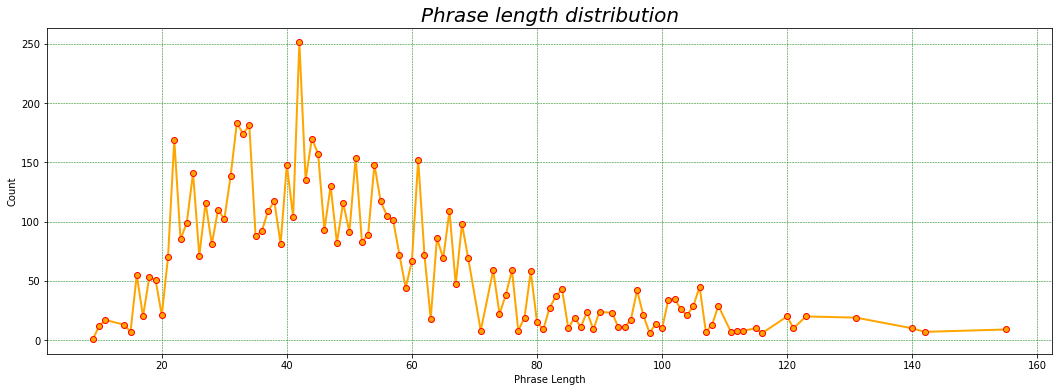

In [161]:

arr = np.array(data['phrase_length'])
key = np.unique(data['phrase_length'])

result={}
for k in key:
    mask = (arr==k)
    arr_new = arr[mask]
    v = arr_new.size
    result[k]=v

x = list(result.keys())
y = list(result.values())

plt.figure(figsize=(18,6))
plt.grid(True,color="g",axis="both",ls="--",lw=0.5)
plt.plot(x,y,linewidth=2, color='orange', marker='o',
         markersize=6, markeredgecolor='red',
         label='Red line')
plt.xlabel("Phrase Length")
plt.ylabel("Count")
plt.title("Phrase length distribution",fontsize=20,fontstyle='italic')
#plt.savefig('line.png')
plt.show()

In [114]:
pip install jieba

     |████████████████████████████████| 19.2 MB 7.6 MB/s eta 0:00:01
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314477 sha256=eb447386c340472c7771998a35fce6c47a411e0e0ecc44e6ed9729de020e4557
  Stored in directory: /Users/wanyu/Library/Caches/pip/wheels/ca/38/d8/dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


6661
chest acne breaks never clears


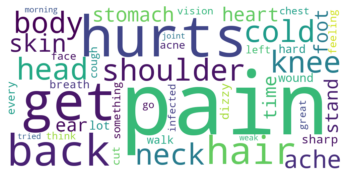

In [148]:
from wordcloud import WordCloud
import re
import jieba
from collections import Counter

text = data['new_text'].tolist()
print(len(text))

def token(string):
    return re.findall('\w+',string)
text_clean = [' '.join(token(str(s))) for s in text]
print(text_clean[100])

def cut_word(string):
    return list(jieba.cut(string))

text_words = [cut_word(string) for string in text_clean]
list_set=[]
for i in text_words:
    list_set.extend(i)
    
words_count = Counter(list_set)
statics = words_count.most_common()[:50]
d = dict(statics)

keys_to_remove = [' ', 'ca','nt','feel','feels','like']
for key in keys_to_remove:
    d.pop(key)
#print(d.keys())
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate_from_frequencies(d)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [204]:
pip install brewer2mpl

Note: you may need to restart the kernel to use updated packages.


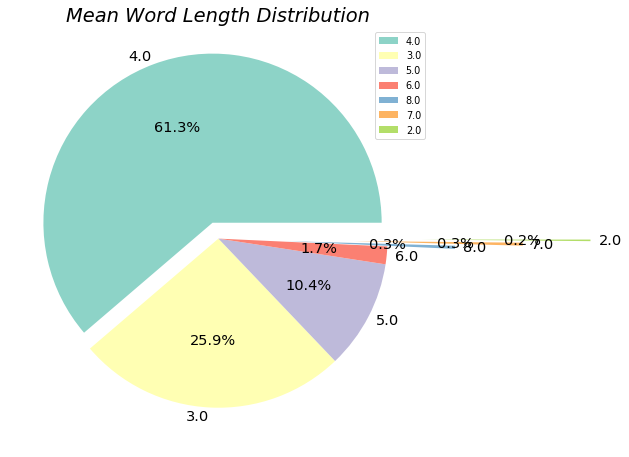

In [215]:
import brewer2mpl
bmap = brewer2mpl.get_map('Set3', 'qualitative', 10)
colors = bmap.mpl_colors
mean_word = data['mean_word_len'].round(decimals = 0)
#print(mean_word.value_counts().keys())
y = mean_word.value_counts().values
#print(y)
mylabels = mean_word.value_counts().keys()
#print(mylabels)
plt.figure(figsize=(8, 8), dpi=70)
explode = (0.1,0,0,0,0.4,0.8,1.2)
plt.pie(y,labels = mylabels,autopct='%1.1f%%',explode=explode,textprops={'fontsize': 15},labeldistance=1.05,colors=colors)
plt.legend(loc='upper right', fontsize=10)
plt.title('Mean Word Length Distribution',fontsize=20,fontstyle='italic')
#plt.savefig('pie.png')
plt.show()